# Import Data

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

df = pd.read_csv("../dataset/clean_data.csv")
df

,Indicator Name,Year,Sex,Age Group,Age Category,Number,Percent of All Causes,Death Rate
0,All Causes,2020,All,[All],All Ages,109155.0,100.0,337.252065
1,All Causes,2020,All,[0],Infant,2367.0,100.0,444.185060
2,All Causes,2020,All,[1-4],Toddler,410.0,100.0,19.503136
3,All Causes,2020,All,[5-9],Child,294.0,100.0,11.722119
4,All Causes,2020,All,[10-14],Child,402.0,100.0,16.434815
...,...,...,...,...,...,...,...,...
201595,COVID-19,2000,Female,[65-69],Senior,0.0,0.0,0.000000
201596,COVID-19,2000,Female,[70-74],Senior,0.0,0.0,0.000000
201597,COVID-19,2000,Female,[75-79],Senior,0.0,0.0,0.000000
201598,COVID-19,2000,Female,[80-84],Elderly,0.0,0.0,0.000000


# Death Rate per Year

In [43]:
# Filter for total population and all causes
filtered = df[
    (df['Sex'] == 'All') &
    (df['Age Group'] == '[All]') &
    (df['Indicator Name'] == 'All Causes')
].copy()
filtered

,Indicator Name,Year,Sex,Age Group,Age Category,Number,Percent of All Causes,Death Rate
0,All Causes,2020,All,[All],All Ages,109155.0,100.0,337.252065
9600,All Causes,2019,All,[All],All Ages,109164.0,100.0,341.673746
19200,All Causes,2018,All,[All],All Ages,117387.0,100.0,372.325797
28800,All Causes,2017,All,[All],All Ages,97440.0,100.0,313.265099
38400,All Causes,2016,All,[All],All Ages,85637.0,100.0,279.087390
48000,All Causes,2015,All,[All],All Ages,80691.0,100.0,266.562391
57600,All Causes,2014,All,[All],All Ages,77365.0,100.0,251.933282
67200,All Causes,2013,All,[All],All Ages,74147.0,100.0,245.408832
76800,All Causes,2012,All,[All],All Ages,71848.0,100.0,243.469829
86400,All Causes,2011,All,[All],All Ages,70836.0,100.0,243.740666


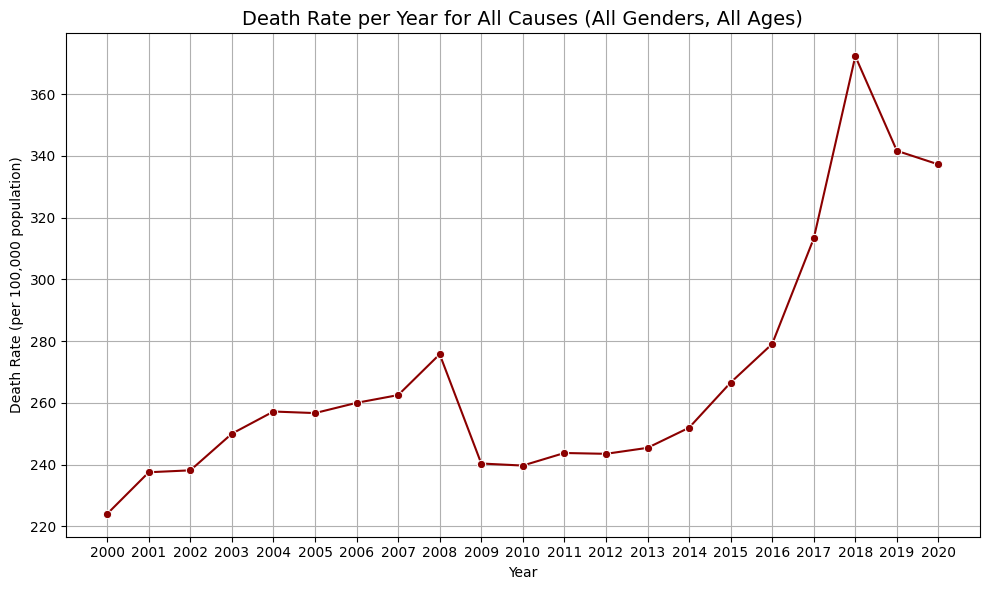

In [44]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered, x='Year', y='Death Rate', marker='o', color='darkred')
plt.title('Death Rate per Year for All Causes (All Genders, All Ages)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.xticks(ticks=range(2000, 2021))
plt.grid(True)
plt.tight_layout()
plt.show()

# Growth Rate of Death Rate per Year

In [45]:
# Growth rate of Death Rate in percentage year by year for All Causes (All Genders, All Ages)
filtered = filtered.sort_values('Year').reset_index(drop=True)
filtered['Death_Rate_Growth_%'] = filtered['Death Rate'].pct_change(fill_method=None) * 100
filtered['Death_Rate_Growth_%'] = filtered['Death_Rate_Growth_%'].round(2)
filtered.loc[0, 'Death_Rate_Growth_%'] = 0
result = filtered[['Year', 'Death Rate', 'Death_Rate_Growth_%']].reset_index(drop=True)
print(result)

    Year  Death Rate  Death_Rate_Growth_%
0   2000  224.020972                 0.00
1   2001  237.499335                 6.02
2   2002  238.119915                 0.26
3   2003  250.003856                 4.99
4   2004  257.178734                 2.87
5   2005  256.673537                -0.20
6   2006  259.995807                 1.29
7   2007  262.506283                 0.97
8   2008  275.743989                 5.04
9   2009  240.329068               -12.84
10  2010  239.668649                -0.27
11  2011  243.740666                 1.70
12  2012  243.469829                -0.11
13  2013  245.408832                 0.80
14  2014  251.933282                 2.66
15  2015  266.562391                 5.81
16  2016  279.087390                 4.70
17  2017  313.265099                12.25
18  2018  372.325797                18.85
19  2019  341.673746                -8.23
20  2020  337.252065                -1.29


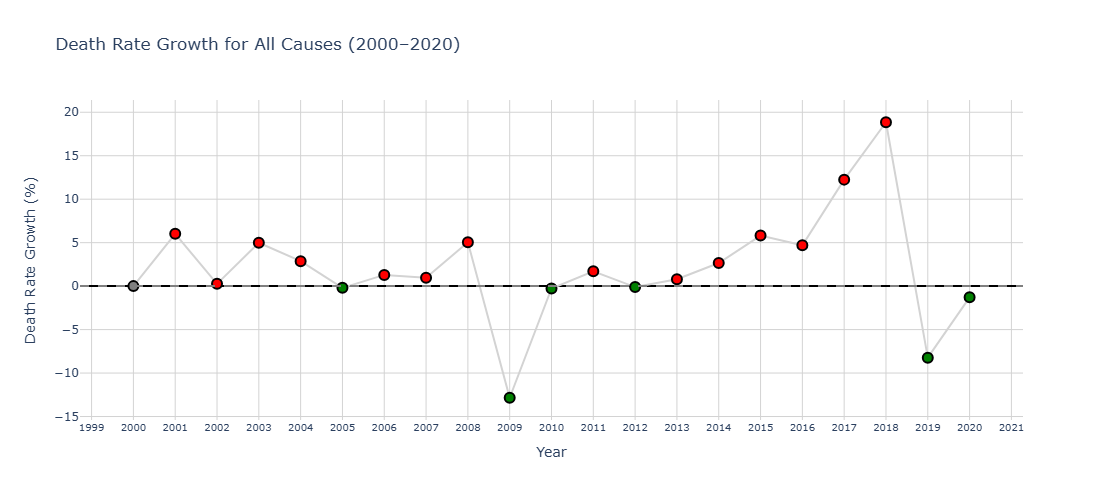

In [64]:
# Assign marker colors based on growth rate
def marker_color(val):
    if val > 0:
        return 'red'
    elif val < 0:
        return 'green'
    else:
        return 'gray'

filtered['Color'] = filtered['Death_Rate_Growth_%'].apply(marker_color)

# Create figure
fig = go.Figure()

# Add line with colored markers and custom tooltip
fig.add_trace(go.Scatter(
    x=filtered['Year'],
    y=filtered['Death_Rate_Growth_%'],
    mode='lines+markers',
    marker=dict(
        color=filtered['Color'],
        size=10,
        line=dict(width=2, color='black')
    ),
    line=dict(width=2, color='lightgray'),
    text=[
        f"{year}<br>Growth Rate: {growth}%<br>Death Rate: {rate:.2f}<br>Deaths: {int(deaths):,}"
        for year, growth, rate, deaths in zip(
            filtered['Year'],
            filtered['Death_Rate_Growth_%'],
            filtered['Death Rate'],
            filtered['Number']
        )
    ],
    hovertemplate='%{text}<extra></extra>',
    name='Death_Rate_Growth_%'
))

# Add horizontal zero line
fig.add_hline(y=0, line_dash='dash', line_color='gray')

# Customize layout
fig.update_layout(
    title='Death Rate Growth for All Causes (2000–2020)',
    xaxis=dict(
        tickmode='linear',
        dtick=1,
        title='Year',
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        tickangle=0,
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        title='Death Rate Growth (%)',
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        zeroline=True,
        zerolinecolor='black'
    ),
    plot_bgcolor='white',
    font=dict(size=12),
    height=500
)

fig.show()

# Top 5 Causes by Growth Rate of Death Rate

In [47]:
# Filter out rows with 'All Causes'
df = df[df['Indicator Name'] != 'All Causes']
df

,Indicator Name,Year,Sex,Age Group,Age Category,Number,Percent of All Causes,Death Rate
20,Tuberculosis,2020,All,[All],All Ages,886.0,0.811690,2.737441
21,Tuberculosis,2020,All,[0],Infant,1.0,0.042248,0.187657
22,Tuberculosis,2020,All,[1-4],Toddler,0.0,0.000000,0.000000
23,Tuberculosis,2020,All,[5-9],Child,3.0,1.020408,0.119613
24,Tuberculosis,2020,All,[10-14],Child,6.0,1.492537,0.245296
...,...,...,...,...,...,...,...,...
201595,COVID-19,2000,Female,[65-69],Senior,0.0,0.000000,0.000000
201596,COVID-19,2000,Female,[70-74],Senior,0.0,0.000000,0.000000
201597,COVID-19,2000,Female,[75-79],Senior,0.0,0.000000,0.000000
201598,COVID-19,2000,Female,[80-84],Elderly,0.0,0.000000,0.000000


In [48]:
# Keep only Sex and Age Group = All
df = df[(df['Sex'] == 'All') & (df['Age Group'] == '[All]')]
df

,Indicator Name,Year,Sex,Age Group,Age Category,Number,Percent of All Causes,Death Rate
20,Tuberculosis,2020,All,[All],All Ages,886.0,0.811690,2.737441
40,STDs excluding HIV,2020,All,[All],All Ages,16.0,0.014658,0.049435
60,Syphilis,2020,All,[All],All Ages,6.0,0.005497,0.018538
80,Chlamydia,2020,All,[All],All Ages,0.0,0.000000,0.000000
100,Gonorrhoea,2020,All,[All],All Ages,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
195180,Ill-defined malignant neoplasms,2000,All,[All],All Ages,622.0,1.197075,2.681698
195200,Other malignant neoplasms,2000,All,[All],All Ages,192.0,0.369515,0.827791
195220,Ill-defined circulatory diseases,2000,All,[All],All Ages,3717.0,7.153580,16.025519
195240,Other circulatory diseases,2000,All,[All],All Ages,751.0,1.445343,3.237870


In [49]:
# Group same indicator name together
df = df.groupby(['Indicator Name', 'Year'])['Death Rate'].sum().reset_index()
df

,Indicator Name,Year,Death Rate
0,Abdominal wall defect,2000,0.0
1,Abdominal wall defect,2001,0.0
2,Abdominal wall defect,2002,0.0
3,Abdominal wall defect,2003,0.0
4,Abdominal wall defect,2004,0.0
...,...,...,...
3418,lymphatic filariasis,2016,0.0
3419,lymphatic filariasis,2017,0.0
3420,lymphatic filariasis,2018,0.0
3421,lymphatic filariasis,2019,0.0


In [50]:
# Find earliest and latest years
min_year = df['Year'].min()
max_year = df['Year'].max()
print(min_year)
print(max_year)

2000
2020


In [51]:
# Filter oldest data
start = df[df['Year'] == min_year]
start

,Indicator Name,Year,Death Rate
0,Abdominal wall defect,2000,0.000000
21,Alcohol use disorders,2000,0.107785
42,Alzheimer and other dementias,2000,0.030180
63,Anencephaly,2000,0.206948
84,Anorectal atresia,2000,0.008623
...,...,...,...
3318,b. Non-Hodgkin lymphoma,2000,0.944199
3339,b. Non-melanoma skin cancer,2000,0.086228
3360,c. Multiple myeloma,2000,0.194014
3381,c. Other pharynx cancer,2000,0.206948


In [52]:
# Filter latest data
end = df[df['Year'] == max_year]
end

,Indicator Name,Year,Death Rate
20,Abdominal wall defect,2020,0.000000
41,Alcohol use disorders,2020,0.024717
62,Alzheimer and other dementias,2020,0.216276
83,Anencephaly,2020,0.120497
104,Anorectal atresia,2020,0.000000
...,...,...,...
3338,b. Non-Hodgkin lymphoma,2020,1.597355
3359,b. Non-melanoma skin cancer,2020,0.284249
3380,c. Multiple myeloma,2020,0.466539
3401,c. Other pharynx cancer,2020,0.207007


In [53]:
# Merge both years by Indicator
merged = pd.merge(start, end, on='Indicator Name', suffixes=('_start', '_end'))
merged

,Indicator Name,Year_start,Death Rate_start,Year_end,Death Rate_end
0,Abdominal wall defect,2000,0.000000,2020,0.000000
1,Alcohol use disorders,2000,0.107785,2020,0.024717
2,Alzheimer and other dementias,2000,0.030180,2020,0.216276
3,Anencephaly,2000,0.206948,2020,0.120497
4,Anorectal atresia,2000,0.008623,2020,0.000000
...,...,...,...,...,...
158,b. Non-Hodgkin lymphoma,2000,0.944199,2020,1.597355
159,b. Non-melanoma skin cancer,2000,0.086228,2020,0.284249
160,c. Multiple myeloma,2000,0.194014,2020,0.466539
161,c. Other pharynx cancer,2000,0.206948,2020,0.207007


In [54]:
# Calculate percentage growth, protect from division by zero
merged['Growth_Rate_%'] = ((merged['Death Rate_end'] - merged['Death Rate_start']) / 
                           merged['Death Rate_start'].replace(0, 1)) * 100

# Round and convert for better formatting
merged['Death Rate_start'] = merged['Death Rate_start'].astype(int)
merged['Death Rate_end'] = merged['Death Rate_end'].astype(int)
merged['Growth_Rate_%'] = merged['Growth_Rate_%'].round(2)

# Final full table
merged

,Indicator Name,Year_start,Death Rate_start,Year_end,Death Rate_end,Growth_Rate_%
0,Abdominal wall defect,2000,0,2020,0,0.00
1,Alcohol use disorders,2000,0,2020,0,-77.07
2,Alzheimer and other dementias,2000,0,2020,0,616.62
3,Anencephaly,2000,0,2020,0,-41.77
4,Anorectal atresia,2000,0,2020,0,-100.00
...,...,...,...,...,...,...
158,b. Non-Hodgkin lymphoma,2000,0,2020,1,69.18
159,b. Non-melanoma skin cancer,2000,0,2020,0,229.65
160,c. Multiple myeloma,2000,0,2020,0,140.47
161,c. Other pharynx cancer,2000,0,2020,0,0.03


In [55]:
# Sort the table by growth rate descending and select top 5
top5_growth = merged.sort_values(by='Growth_Rate_%', ascending=False).head(5)
top5_growth

,Indicator Name,Year_start,Death Rate_start,Year_end,Death Rate_end,Growth_Rate_%
58,Inflammatory bowel disease,2000,0,2020,0,1440.74
55,Hypertensive heart disease,2000,0,2020,2,1227.46
98,Other genitourinary system diseases,2000,0,2020,4,987.13
82,Mesothelioma,2000,0,2020,0,903.27
149,Upper respiratory infections,2000,0,2020,0,688.29


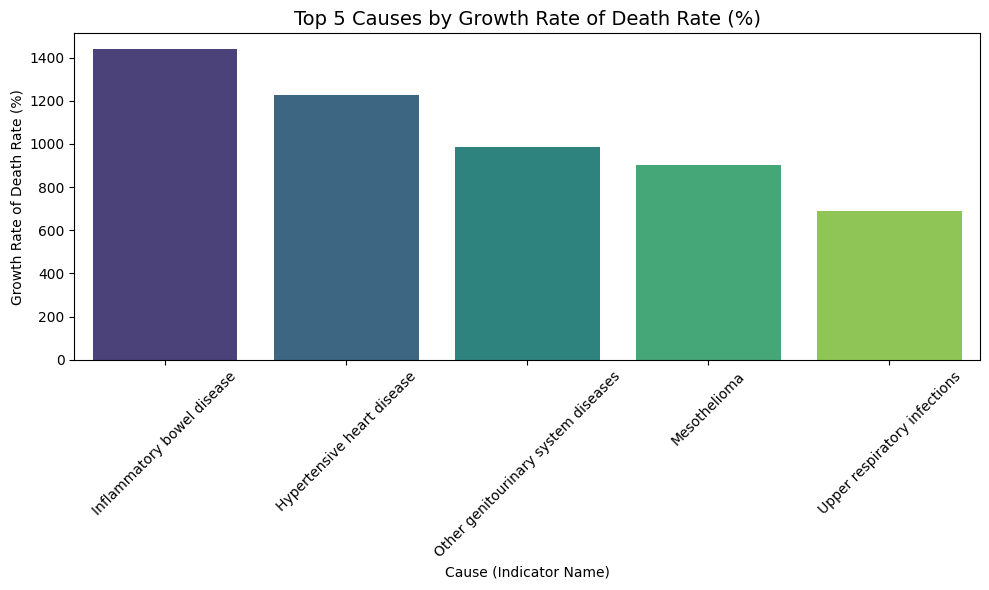

In [56]:
# Plot with x as hue and no legend
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_growth, x='Indicator Name', y='Growth_Rate_%',
            hue='Indicator Name', palette='viridis', legend=False)

# Add labels and title
plt.title('Top 5 Causes by Growth Rate of Death Rate (%)', fontsize=14)
plt.ylabel('Growth Rate of Death Rate (%)')
plt.xlabel('Cause (Indicator Name)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Correlation between the Top 5 Growth of Death Rate Causes

In [57]:
# Get top 5 cause names
top5_causes = top5_growth['Indicator Name'].tolist()
print(top5_causes)

['Inflammatory bowel disease', 'Hypertensive heart disease', 'Other genitourinary system diseases', 'Mesothelioma', 'Upper respiratory infections']


In [58]:
# Load unfiltered file
df_unfiltered = pd.read_csv("../dataset/clean_data.csv")
df_unfiltered

,Indicator Name,Year,Sex,Age Group,Age Category,Number,Percent of All Causes,Death Rate
0,All Causes,2020,All,[All],All Ages,109155.0,100.0,337.252065
1,All Causes,2020,All,[0],Infant,2367.0,100.0,444.185060
2,All Causes,2020,All,[1-4],Toddler,410.0,100.0,19.503136
3,All Causes,2020,All,[5-9],Child,294.0,100.0,11.722119
4,All Causes,2020,All,[10-14],Child,402.0,100.0,16.434815
...,...,...,...,...,...,...,...,...
201595,COVID-19,2000,Female,[65-69],Senior,0.0,0.0,0.000000
201596,COVID-19,2000,Female,[70-74],Senior,0.0,0.0,0.000000
201597,COVID-19,2000,Female,[75-79],Senior,0.0,0.0,0.000000
201598,COVID-19,2000,Female,[80-84],Elderly,0.0,0.0,0.000000


In [59]:
# Filter for top 5 causes + All Sex + All Age Group
df_top5 = df_unfiltered[
    (df_unfiltered['Indicator Name'].isin(top5_causes)) &
    (df_unfiltered['Sex'] == 'All') &
    (df_unfiltered['Age Group'] == '[All]')
]
df_top5

,Indicator Name,Year,Sex,Age Group,Age Category,Number,Percent of All Causes,Death Rate
740,Upper respiratory infections,2020,All,[All],All Ages,11.0,0.010077,0.033986
1520,Mesothelioma,2020,All,[All],All Ages,14.0,0.012826,0.043255
2120,Hypertensive heart disease,2020,All,[All],All Ages,778.0,0.712748,2.403757
2380,Inflammatory bowel disease,2020,All,[All],All Ages,86.0,0.078787,0.265711
2500,Other genitourinary system diseases,2020,All,[All],All Ages,1426.0,1.306399,4.405858
...,...,...,...,...,...,...,...,...
192740,Upper respiratory infections,2000,All,[All],All Ages,1.0,0.001925,0.004311
193560,Mesothelioma,2000,All,[All],All Ages,1.0,0.001925,0.004311
194160,Hypertensive heart disease,2000,All,[All],All Ages,42.0,0.080831,0.181079
194400,Inflammatory bowel disease,2000,All,[All],All Ages,4.0,0.007698,0.017246


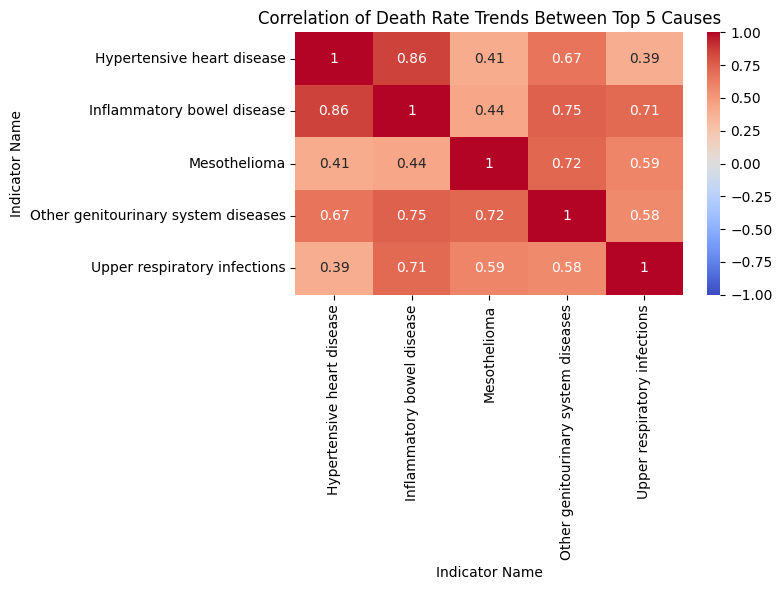

In [60]:
# Pivot table — rows = year, columns = cause, values = death rate
pivot_df = df_top5.pivot_table(
    index='Year',
    columns='Indicator Name',
    values='Death Rate'
)

# Calculate correlation between the 5 causes' trends
corr_matrix = pivot_df.corr()

# Visualize as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Death Rate Trends Between Top 5 Causes")
plt.tight_layout()
plt.show()

# Distribution of Top 5 Causes by Age and Gender

In [61]:
# Now filter top 5 causes with all column
df_top5_dist = df_unfiltered[df_unfiltered['Indicator Name'].isin(top5_causes)]
df_top5_dist

,Indicator Name,Year,Sex,Age Group,Age Category,Number,Percent of All Causes,Death Rate
740,Upper respiratory infections,2020,All,[All],All Ages,11.0,0.010077,0.033986
741,Upper respiratory infections,2020,All,[0],Infant,0.0,0.000000,0.000000
742,Upper respiratory infections,2020,All,[1-4],Toddler,0.0,0.000000,0.000000
743,Upper respiratory infections,2020,All,[5-9],Child,0.0,0.000000,0.000000
744,Upper respiratory infections,2020,All,[10-14],Child,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
200855,Other genitourinary system diseases,2000,Female,[65-69],Senior,4.0,0.189394,2.118150
200856,Other genitourinary system diseases,2000,Female,[70-74],Senior,2.0,0.098425,1.476592
200857,Other genitourinary system diseases,2000,Female,[75-79],Senior,2.0,0.116279,2.399088
200858,Other genitourinary system diseases,2000,Female,[80-84],Elderly,7.0,0.527903,15.707041


In [62]:
# Group and sum by Cause, Age Category, Sex
grouped = df_top5_dist.groupby(['Indicator Name', 'Age Category', 'Sex'])['Number'].sum().reset_index()
grouped

,Indicator Name,Age Category,Sex,Number
0,Hypertensive heart disease,Adult,All,364.0
1,Hypertensive heart disease,Adult,Female,80.0
2,Hypertensive heart disease,Adult,Male,284.0
3,Hypertensive heart disease,All Ages,All,3563.0
4,Hypertensive heart disease,All Ages,Female,1388.0
...,...,...,...,...
145,Upper respiratory infections,Toddler,Female,4.0
146,Upper respiratory infections,Toddler,Male,6.0
147,Upper respiratory infections,Young Adult,All,20.0
148,Upper respiratory infections,Young Adult,Female,4.0


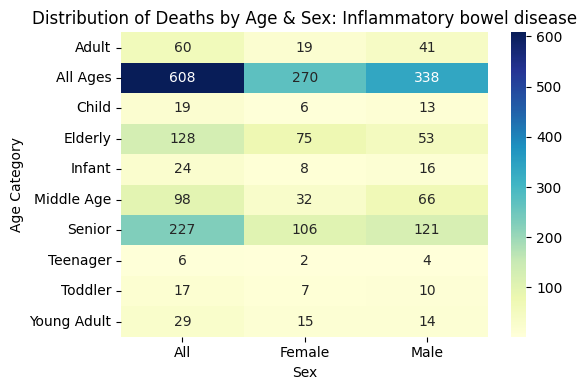

Correlation between Male and Female distribution for Inflammatory bowel disease: 0.99


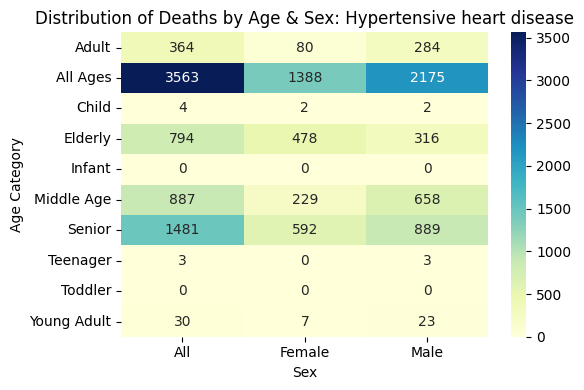

Correlation between Male and Female distribution for Hypertensive heart disease: 0.97


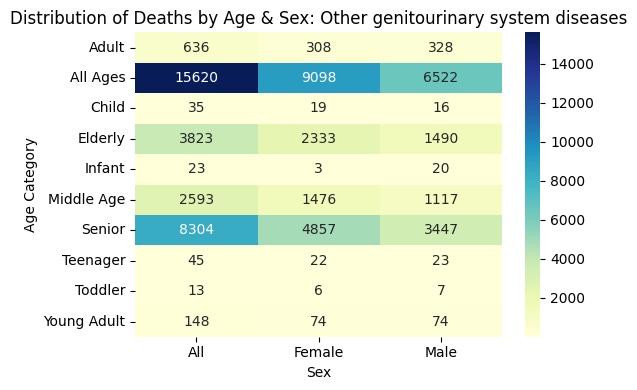

Correlation between Male and Female distribution for Other genitourinary system diseases: 1.0


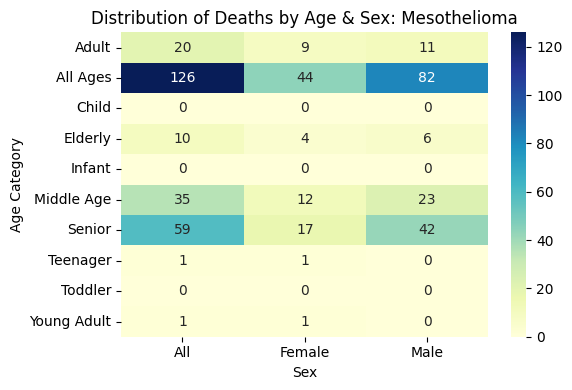

Correlation between Male and Female distribution for Mesothelioma: 0.99


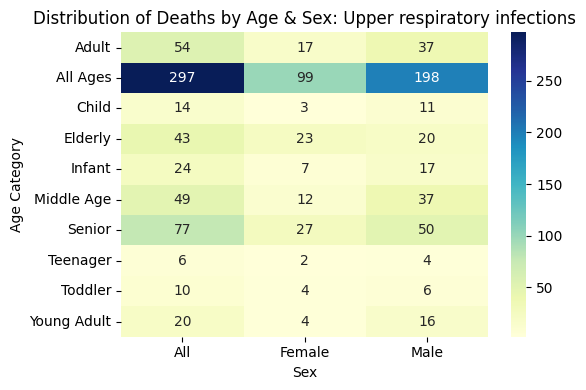

Correlation between Male and Female distribution for Upper respiratory infections: 0.98


In [63]:
# Create a pivot table for heatmap
for cause in top5_causes:
    pivot = grouped[grouped['Indicator Name'] == cause].pivot(index='Age Category', columns='Sex', values='Number').fillna(0)

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
    plt.title(f'Distribution of Deaths by Age & Sex: {cause}')
    plt.ylabel('Age Category')
    plt.xlabel('Sex')
    plt.tight_layout()
    plt.show()

    # Correlation between Male and Female distribution
    if 'Male' in pivot.columns and 'Female' in pivot.columns:
        r = pivot['Male'].corr(pivot['Female'])
        print(f"Correlation between Male and Female distribution for {cause}: {round(r, 2)}")